# THE SPARK FOUNDATION

## Grip Task 5 : Exploratory Data Analysis - Sports (Jan21)

### Author : Sandeep Thirumurthi

### Perform ‘Exploratory Data Analysis’ on dataset ‘Indain Premier League’

#### As a sports analysts, find out the most successful teams, players and factors contributing to win or loss of a team.

#### *Dataset Link : https://bit.ly/34SRn3b*

In [1]:
# Import Packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Data Gathering
match = pd.read_csv('E:\Downloads\Indian Premier League\TASK 5_DataSet_Matches.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [33]:
match.isnull

<bound method DataFrame.isnull of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [5]:
# Dropping the umpire columns to get rid of null values
match = match.drop(['umpire3'],axis=1)

In [6]:
#the total no of rows and columns
print('The Total no of rows and columns in matches dataset is', match.shape)

The Total no of rows and columns in matches dataset is (756, 17)


Total Matches Played 756

In [7]:
len(match['season'].unique())

12

Toal No.of Season 12

In [8]:
pd.concat([match['team1'],match['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Total Teams = 15 

### Most Wins

In [9]:
match.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

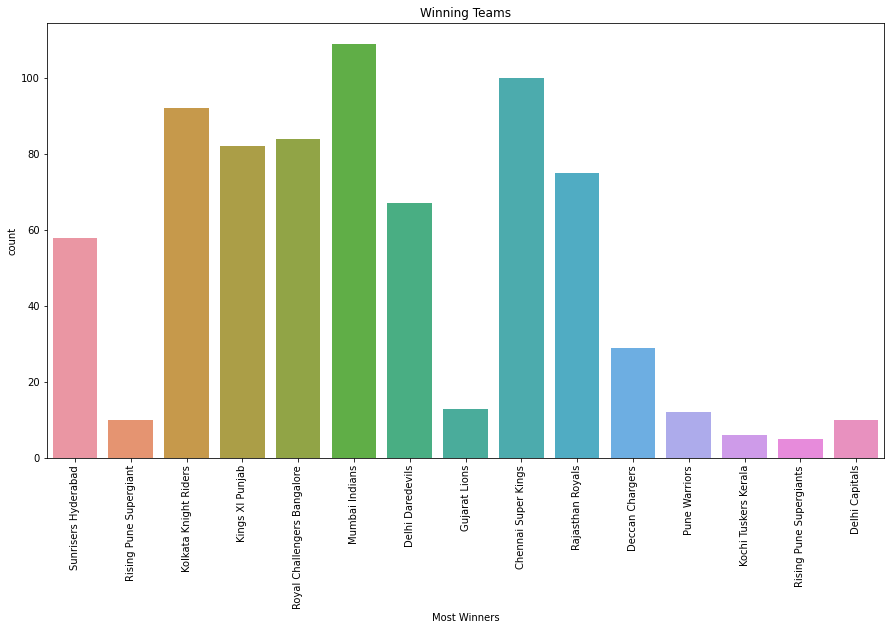

In [10]:
plt.figure(figsize= (15,8))
sns.countplot(x = 'winner', data = match)
plt.title('Winning Teams')
plt.xlabel('Most Winners')
plt.xticks(rotation = 90);

# ; Adding a semicolon in last lines of code used to avoid the arraylist in the graph.

### Win by Runs

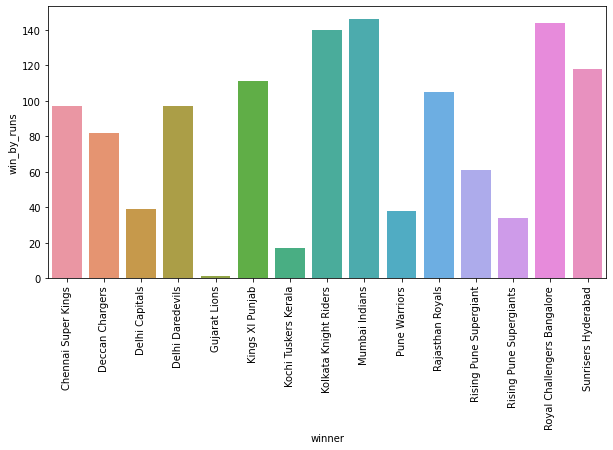

In [11]:
win_max= match.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation= 90)
sns.barplot(win_max['winner'],win_max['win_by_runs']);

Mumbai Indians is the team with most wins.

### Most Man of Match Winners

In [12]:
match['player_of_match'].value_counts()[:20]

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
A Mishra          11
DR Smith          11
V Sehwag          11
AD Russell        11
KA Pollard        10
JH Kallis         10
AT Rayudu          9
SP Narine          9
Name: player_of_match, dtype: int64

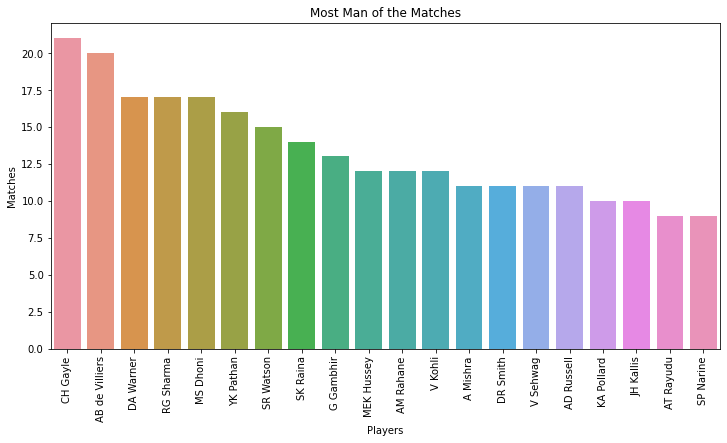

In [13]:
plt.figure (figsize= (12,6))
sns.barplot (x = match.player_of_match.value_counts()[:20].index, y = match.player_of_match.value_counts()[:20])
plt.title('Most Man of the Matches')
plt.xlabel("Players")
plt.ylabel("Matches")
plt.xticks(rotation = 90);

Gayle won the most number of MOM awards in IPL

### Most IPL Wins

In [14]:
match.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

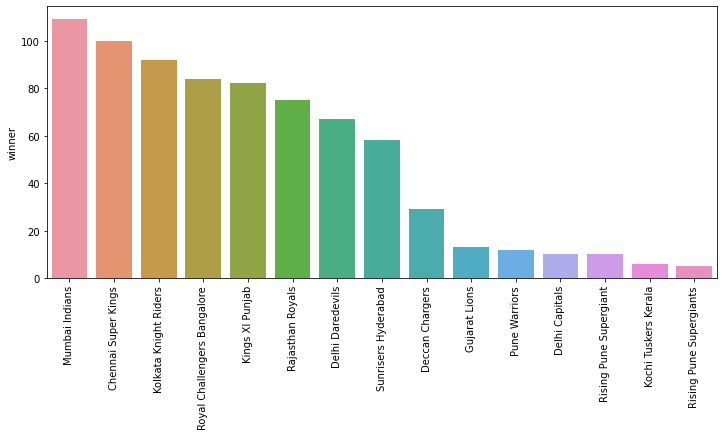

In [15]:
plt.figure (figsize= (12,5))
sns.barplot (x = match.winner.value_counts().index, y = match.winner.value_counts())
plt.xticks(rotation = 90);

Mumbai Indians have won most matches of 109

Most Toss Winning Side

In [16]:
match.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

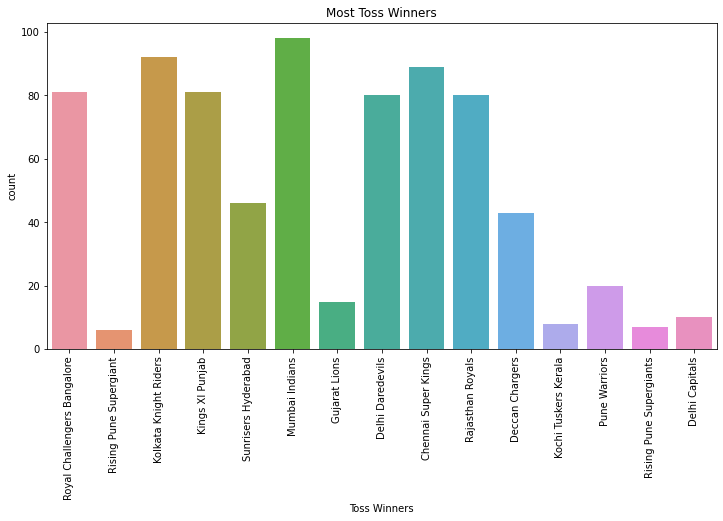

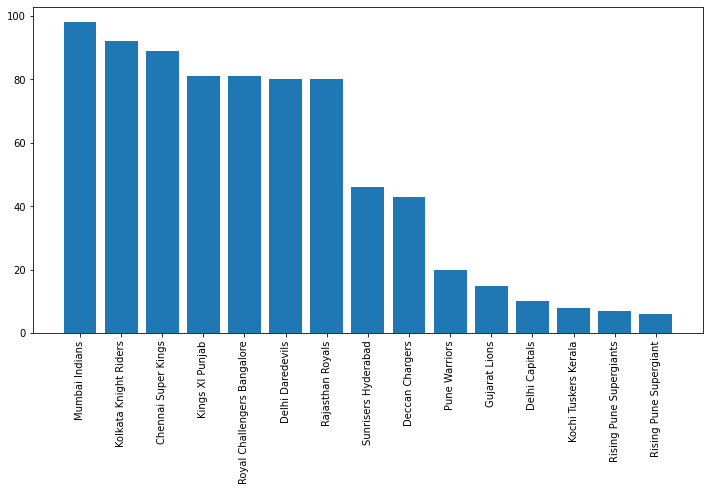

In [17]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'toss_winner', data = match)
plt.title('Most Toss Winners')
plt.xlabel('Toss Winners')
plt.xticks(rotation = 90);

# OR

plt.figure(figsize=(12,6))
plt.bar(list(match['toss_winner'].value_counts().keys()),list(match['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()


Mumbai Indians won the most number of toss so far

### Comparing the Toss Decision

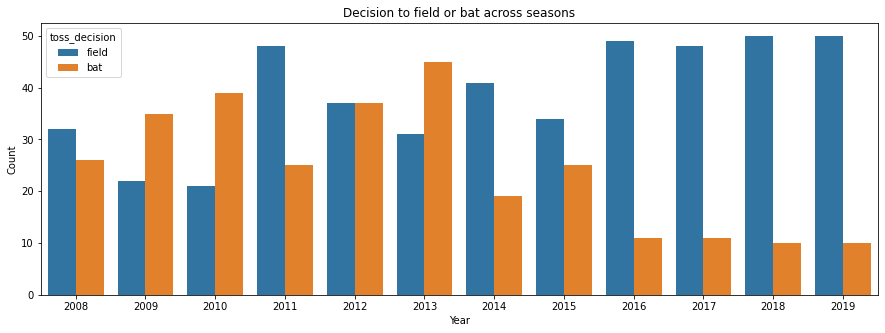

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(match['season'].sort_values(), hue = match['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [19]:
# match.toss_decision.value_counts()
match.season.sort_values()[:10]

116    2008
82     2008
81     2008
80     2008
79     2008
78     2008
77     2008
76     2008
75     2008
74     2008
Name: season, dtype: int64

### When a team wins after batting on first position

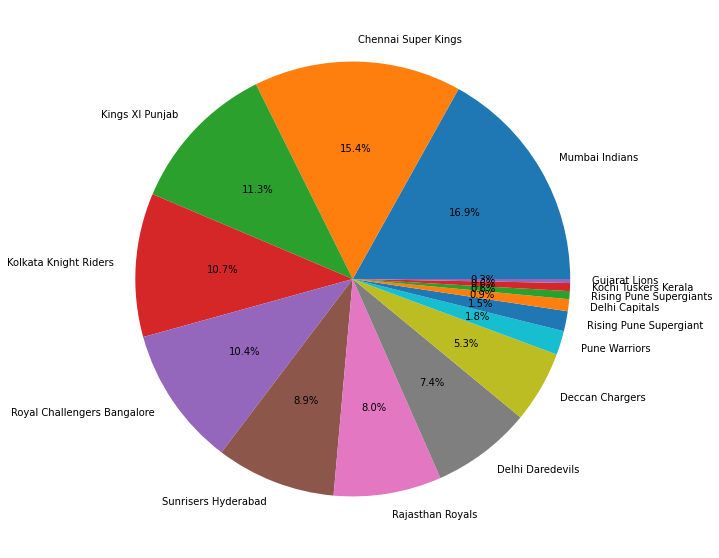

In [20]:
batting_first = match[match['win_by_runs']!=0]
plt.figure(figsize=(10,10))

plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
        
plt.show()

### When a team wins after batting on second position

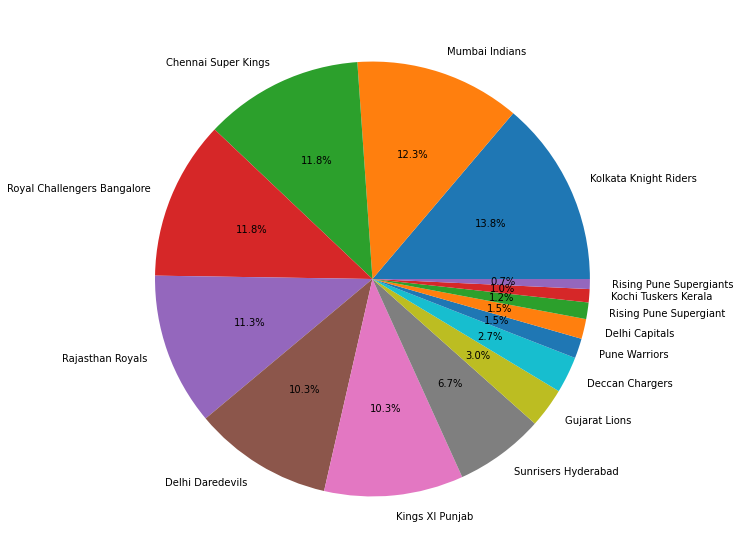

In [21]:
batting_second = match[match['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()

### Match Venues

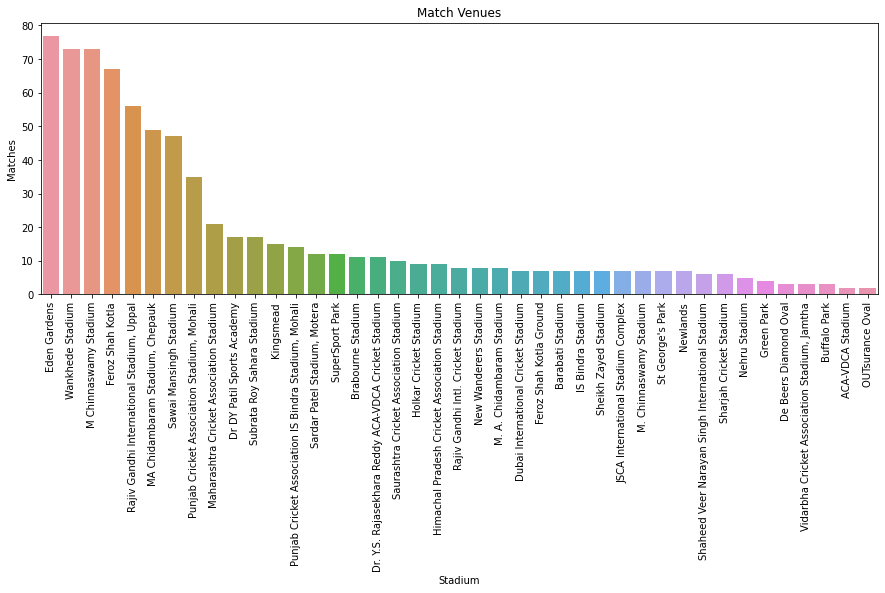

In [22]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = match,order = match['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90);

Eden Garden is the most popular venue

### Analysis of deliveries dataset

In [23]:
deliveries = pd.read_csv('E:\Downloads\Indian Premier League\TASK 5_DataSet_Deliveries.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [24]:
print('The Total no of rows and columns in deliveries dataset is ', deliveries.shape)

The Total no of rows and columns in deliveries dataset is  (179078, 21)


In [25]:
# Total matches where Super over was and wasn't played
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [26]:
# total overall runs given by Extra

sum(deliveries['extra_runs'])

12004

In [27]:
# Total runs given by no balls

sum(deliveries['noball_runs'])

749

In [28]:
# Total runs given by penalty

sum(deliveries['penalty_runs'])

10

In [29]:
# Total soft-dissmisal of players over the years

sum(deliveries['player_dismissed'].value_counts())

8834

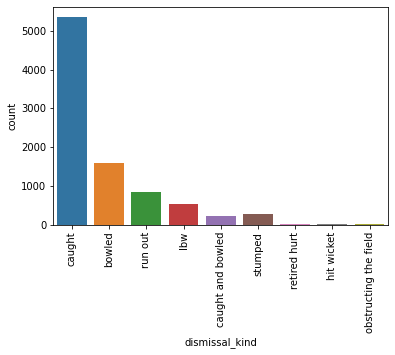

In [30]:
# kinds of dismissal

sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90);

### Conclusion:

#### 1. Most successful Teams : Mumbai Indians and Chennai Super Kings

#### 2. Best players to bid for: Chris Gayle and Ab de Villers.

#### 3. There are many factors on which the win depends: winning a toss, opt field or bat etc.